# Perceptron scikit-learn - Iris dataset

En este ejemplo se implementa el Perceptrón de la biblioteca **scikit-learn** en el conjunto de datos Iris

[Documentación Perceptrón](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

Pasos para realizar experimentación:

1. Cargar y explorar los datos
2. Separar datos de entrenamiento y prueba 
3. Visualizar los datos de entrenamiento
4. Entrenar el modelo
5. Realizar predicciones
6. Medir el éxito del modelo entrenado

Scikit-Learn incluye unas serie de conjuntos de datos estándar para realuzar experimentación sin necesidad de descagar algúna archivo. En este ejemplo se utiliza el conjunto de datos `iris`.



In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import mglearn

In [2]:
iris = datasets.load_iris()
print("Keys of iris_dataset: \n{}".format(iris.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris['DESCR'][:])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print("Target names: {}".format(iris['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print("Feature names: \n{}".format(iris['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("Type of data: {}".format(type(iris['data'])))

Type of data: <class 'numpy.ndarray'>


In [7]:
print("Shape of data: {}".format(iris['data'].shape))

Shape of data: (150, 4)


In [8]:
print("First five columns of data:\n{}".format(iris['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
print("Type of target: {}".format(type(iris['target'])))

Type of target: <class 'numpy.ndarray'>


In [10]:
print("Shape of target: {}".format(iris['target'].shape))

Shape of target: (150,)


In [11]:
print("Target:\n{}".format(iris['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
#X = iris.data[:, [2, 3]]
X = iris['data']
y = iris['target']

print('Etiquetas de clase:', np.unique(y))

Etiquetas de clase: [0 1 2]


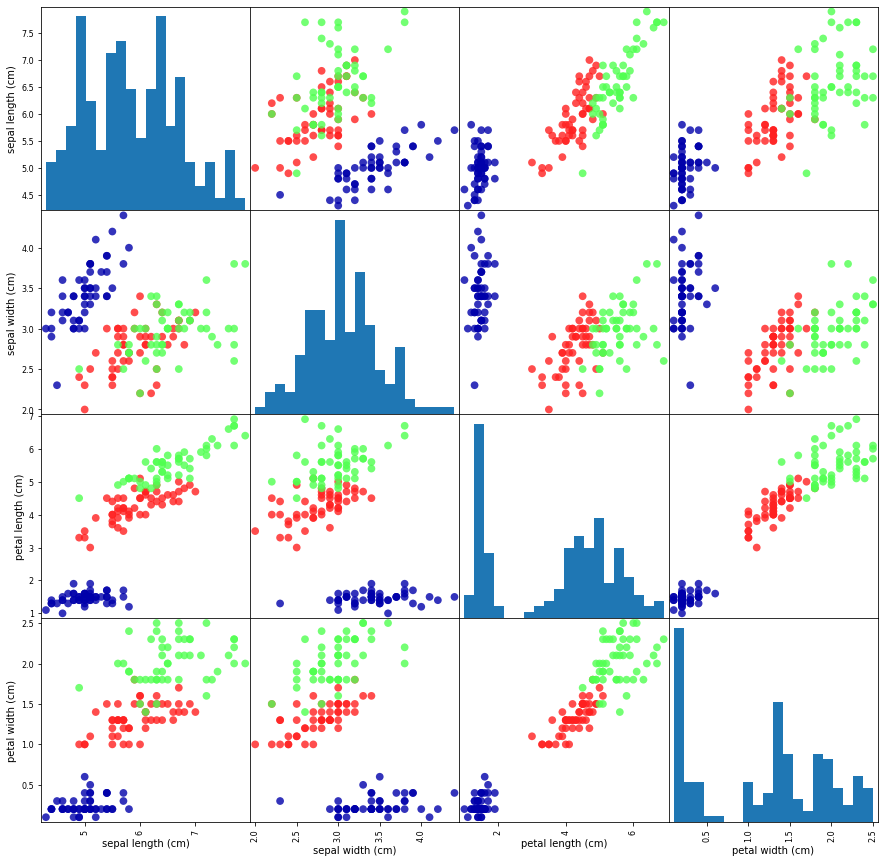

In [13]:
df_iris = pd.DataFrame(X, columns=iris.feature_names)
gg = pd.plotting.scatter_matrix(df_iris, c=y, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha = 0.8, cmap=mglearn.cm3)

En este experimento solo se utilizarán dos características: 'petal length (cm)', 'petal width (cm)'.

In [14]:
X = iris.data[:, [2, 3]]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

## `model_selection`

Permite separar aleatoriamente los arreglos $X$ y $y$ en un 30% como datos de prueba (45 ejemplos) y un 70% como datos de entrenamiento (105 ejemplos).

La función `train_test_split` revuelve los ejemplos antes de dividirlos. En caso contrario el conjunto de entrenamiento estaría conformado por las clases 0 y 1. Y el conjunto de prueba por ejemplos de la clase 2. 

- El parámetro `random_state` determina la semilla para el generador de números pseudo-aleatorios que son usados para revolver el conjunto previo a partirlo. Con un `random_state` areglado se asegura que el resultado sea reproducible.
    
- El parámetro `stratify` siginifica que el métod `traint_test_split` retornará los subconjuntos de entrenamiento y prueba con la misma porción de etiquetas de clase como en el conjunto de datos de salida.  Se puede utilizar la función `bincount` de NumPy para verificar esta última parte. 
    
Referencia de [model_selection](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [16]:
print("Conteo de etiquetas en y:", np.bincount(y))
print("Conteo de etiquetas en y_train:", np.bincount(y_train))
print("Conteo de etiquetas en y_test:", np.bincount(y_test))

Conteo de etiquetas en y: [50 50 50]
Conteo de etiquetas en y_train: [35 35 35]
Conteo de etiquetas en y_test: [15 15 15]


## Escalamiento de las características

De acuerdo a lo visto con el **gradiente descendente** para un óptimo desempeño se requiere el realizar el escalamiento de las características. 

Con la clase `StandardScaler` del módulo `preprocessing` de scikit-learn se realiza el escalamiento.

Referencia de [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


## Entrenamiento del modelo

La mayoría de los algoritmos de scikit-learn ya soportan la clasificación multiclase por defecto a través del método **one vs rest (OVR)**, lo que permite alimentar el modelo con las tres clases de flores de iris.

[Perceptron scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [18]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)


- `eta0` : Taza de aprendizaje
- `n_iter` : número de iteraciones 
- `random_state`: `1` asegurar la reproducción del resultado

In [19]:
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

## Predicciones con el modelo obtenido

El método `predict` permite realizar predicciones 

In [20]:
y_pred = ppn.predict(X_test_std)
print('Ejemplos clasificados incorrectamente: %d' % (y_test != y_pred).sum())

Ejemplos clasificados incorrectamente: 1


El Perceptrón clasifica incorrectamente un ejemplo de la muetra de prueba conformada por 45 ejemplos de flores. este error de clasificación equivale al 2.2% de error $(1/45 \approx 2.2)$.

### Clasificación vs exactitud

En lugar de calcular el error de clasificación incorrecta, muchos practicantes del ML reportan la exactitud de la clasificacción de un modelo.

$1- error = 0.978$ o 97.8%

Otra métricas de desempeño estan disponibles en el módulo `metrics`. Por ejemplo, se puede calcular la exactitud del Percetrón sobre la muestra de prueba:

In [21]:
from sklearn.metrics import accuracy_score
print('Exactitud: %.3f' % accuracy_score(y_test, y_pred))

Exactitud: 0.978


- `y_test`: son las etiquetas de clase verdaderas
- `y_pred`: son las`etiquetas de clase que fueron predecidas
    
Adicional, cada clasificador de scikit-learn tiene  un método `score` el cual cálcula la exactitud de predicción del clasificador.

In [22]:
print('Exactitud train %.3f' % ppn.score(X_train_std, y_train))
print('Exactitud test %.3f' % ppn.score(X_test_std, y_test))

Exactitud train 0.943
Exactitud test 0.978


In [23]:
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt

In [24]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, 
                edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o',
                       s=100, label='test set')

<ipython-input-24-4e5ea6890e55>:22: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o',


<function matplotlib.pyplot.show(close=None, block=None)>

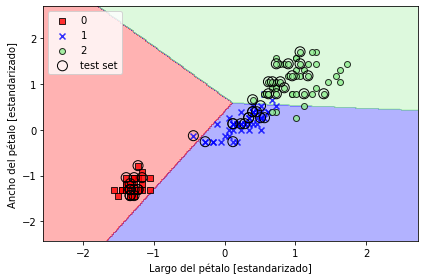

In [25]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = ppn, test_idx = range(105, 150))
plt.xlabel('Largo del pétalo [estandarizado]')
plt.ylabel('Ancho del pétalo [estandarizado]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show